In [45]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

# Upload the file
uploaded = files.upload()

# Read the uploaded file into a DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_excel('u_cars_prices_10_098.xlsx')
print(df)
print(df.head())

# MPG MIN and MPG MAX missing values replace with mean value from Engine Volume (L)
df['MPG MIN'] = df.groupby('Engine Volume (L)')['MPG MIN'].transform(lambda x: x.fillna(x.mean()))
df['MPG MAX'] = df.groupby('Engine Volume (L)')['MPG MAX'].transform(lambda x: x.fillna(x.mean()))
df['MPG MIN'] = df.groupby('Engine Volume (L)')['MPG MIN'].transform(lambda x: x.replace(0, x.mean()))
df['MPG MAX'] = df.groupby('Engine Volume (L)')['MPG MAX'].transform(lambda x: x.replace(0, x.mean()))

# Obtain mean value from Manufacturer correlates to the fields Seller Rating, Seller Reviews Count, .etc
df['Seller Rating'] = df.groupby('Manufacturer')['Seller Rating'].transform(lambda x: x.fillna(x.mean()).round(1))
df['Seller Reviews Count'] = df.groupby('Manufacturer')['Seller Reviews Count'].transform(lambda x: x.fillna(x.mean().round(0)))
df['Car Rating'] = df.groupby('Manufacturer')['Car Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Reviews Count'] = df.groupby('Manufacturer')['Car Reviews Count'].transform(lambda x: x.fillna(x.mean()))
df['Car Recommendation Rate'] = df.groupby('Manufacturer')['Car Recommendation Rate'].transform(lambda x: x.fillna(x.mean()))
df['Car Comfort Rating'] = df.groupby('Manufacturer')['Car Comfort Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Interior Rating'] = df.groupby('Manufacturer')['Car Interior Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Performance Rating'] = df.groupby('Manufacturer')['Car Performance Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Value Rating'] = df.groupby('Manufacturer')['Car Value Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Exterior Rating'] = df.groupby('Manufacturer')['Car Exterior Rating'].transform(lambda x: x.fillna(x.mean()))
df['Car Reliability Rating']  = df.groupby('Manufacturer')['Car Reliability Rating'].transform(lambda x: x.fillna(x.mean()))

# Convert Engine Volume from Cubic to Liters
df['Engine Volume (L)'] = df['Engine Volume (L)'].replace(440, 6.8)
df['Engine Volume (L)'] = df['Engine Volume (L)'].replace(400, 6.3)
df['Engine Volume (L)'] = df['Engine Volume (L)'].replace(348, 5.0)
df['Engine Volume (L)'] = df['Engine Volume (L)'].replace(1600, 1.6)

# drop rows if values is missing for Engine Volume(L)
df = df.dropna(subset=['Engine Volume (L)'])

# drop rows if values is missing for Manufacturer or Price (USD)
df = df.dropna(subset=['Manufacturer','Price (USD)'])

# Filter outlier anomaly values from important fields
df = df[df['Mileage'] < 500000]
df = df[df['Engine Volume (L)'] > 0.3]
df = df[df['Engine Volume (L)'] < 9.0]
df = df[df['MPG MIN'] > 6.0]
df = df[df['MPG MAX'] > 6.0]
df = df[df['MPG MAX'] < 60.0]
df = df[df['MPG MIN'] < 60.0]
df = df[df['Price (USD)'] > 7000]
df = df[df['Year'] > 2008.0]
df = df[df['Year'] < 2024.0]


df = df.round(1)

print(df.head(100))
display(df.head(75))

Saving u_cars_prices_10_098.xlsx to u_cars_prices_10_098 (9).xlsx
       Manufacturer    Year  Price (USD)  MPG MIN  MPG MAX  Engine Volume (L)  \
0           Hyundai  2022.0      29691.0      NaN      NaN                2.5   
1              MINI  2016.0       9500.0     25.0     35.0                1.5   
2        Mitsubishi  2022.0      20999.0     25.0     26.0                1.5   
3              FIAT  2013.0       5999.0     31.0     34.0                1.4   
4              Jeep  2023.0      26304.0     23.0     29.0                1.3   
...             ...     ...          ...      ...      ...                ...   
7934           Ford  2019.0      26988.0     17.0     22.0                3.5   
7935            RAM  2016.0      17900.0      NaN      NaN                3.6   
7936        Hyundai  2022.0      26998.0     22.0     25.0                NaN   
7937           Ford  2021.0      30973.0     19.0     19.0                2.3   
7938  Mercedes-Benz  2016.0      42995.0   

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating
0,Hyundai,2022.0,29691.0,25.3,30.9,2.5,36007.0,1.0,3.5,855.0,4.2,37.0,75.0,4.2,4.1,4.3,3.7,4.5,4.2
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,3.2,17.0,4.8,12.0,91.0,4.8,4.7,4.9,4.6,4.9,4.7
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,2.7,513.0,4.6,9.0,88.0,4.6,4.4,4.4,4.6,4.6,4.3
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,3.9,324.0,5.0,2.0,100.0,5.0,5.0,4.5,5.0,5.0,5.0
6,Jeep,2015.0,10900.0,21.0,29.0,3.2,134237.0,0.0,4.5,0.0,4.4,326.0,84.0,4.6,4.6,4.4,4.3,4.6,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Jeep,2021.0,26888.0,18.0,25.0,3.6,45029.0,1.0,4.9,52.0,4.6,64.0,92.0,4.6,4.7,4.6,4.5,4.7,4.6
106,Lexus,2019.0,27518.0,33.0,30.0,2.5,75088.0,0.0,4.9,558.0,4.7,19.0,89.0,4.7,4.6,4.8,4.6,4.7,4.8
107,Mazda,2013.0,9438.0,24.0,33.0,2.0,88407.0,0.0,4.3,4.0,4.7,83.0,98.0,4.5,4.6,4.7,4.8,4.7,4.8
108,Mercedes-Benz,2018.0,43953.0,17.0,22.0,4.0,27025.0,0.0,3.4,299.0,4.8,4.0,100.0,4.5,4.8,4.8,4.5,5.0,4.3


In [57]:
df.shape

(5792, 20)

In [48]:
Manfacture_Cat_No = {'Acura' : 1, 'Alfa': 2, 'Aston' : 3, 'Audi' : 4, 'Austin-Healey' : 5, 'Bentley' : 6, 'BMW' : 7, 'Buick' : 8, 'Cadillac' : 9, 'Chevrolet' : 10, 'Chrysler' : 11,
'Datsun' : 12, 'Dodge' : 13, 'FIAT' : 14, 'Fisker' : 15, 'Ford' : 16, 'Genesis' : 17, 'Geo' : 18, 'GMC' : 19, 'Honda' : 20, 'Hummer' : 21, 'Hyundai' : 22, 'INFINITI' : 23,
'Isuzu' : 24, 'Jaguar': 25, 'Jeep' : 26, 'Kaiser' : 27, 'Kia' : 28, 'Land' : 29, 'Lexus' : 30, 'Lincoln' : 31, 'Maserati' : 32, 'Mazda' : 33, 'Mercedes-Benz' : 34, 'Mercury' : 35,
'MG' :36, 'MINI' : 37, 'Mitsubishi' : 38, 'Nissan' : 39, 'Oldsmobile' : 40, 'Plymouth' : 41, 'Polestar' : 42, 'Pontiac' : 43, 'Porsche' : 44, 'RAM' : 45, 'Rolls-Royce' : 46,
'Saab' : 47, 'Saturn' : 48, 'Scion' : 49, 'smart' : 50, 'Subaru' : 51, 'Suzuki' : 52, 'Tesla' : 53, 'Toyota' : 54, 'Volkswagen' : 55, 'Volvo' : 56 }

df['Manufacturer_Cat_No'] = df['Manufacturer'].map(Manfacture_Cat_No)

In [49]:
display(df.head(35))

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
0,Hyundai,2022.0,29691.0,25.3,30.9,2.5,36007.0,1.0,3.5,855.0,4.2,37.0,75.0,4.2,4.1,4.3,3.7,4.5,4.2,22
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,3.2,17.0,4.8,12.0,91.0,4.8,4.7,4.9,4.6,4.9,4.7,37
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,2.7,513.0,4.6,9.0,88.0,4.6,4.4,4.4,4.6,4.6,4.3,38
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,3.9,324.0,5.0,2.0,100.0,5.0,5.0,4.5,5.0,5.0,5.0,26
6,Jeep,2015.0,10900.0,21.0,29.0,3.2,134237.0,0.0,4.5,0.0,4.4,326.0,84.0,4.6,4.6,4.4,4.3,4.6,4.4,26
7,Subaru,2019.0,20299.0,27.0,33.0,2.0,53481.0,0.0,4.7,192.0,4.7,208.0,94.0,4.7,4.7,4.6,4.7,4.8,4.8,51
8,Toyota,2018.0,23995.0,30.2,33.4,1.8,55321.0,0.0,4.5,191.0,4.7,48.0,95.0,4.6,4.4,4.8,4.6,4.6,4.8,54
11,Chevrolet,2022.0,24999.0,29.0,33.0,1.3,28737.0,0.0,4.2,281.0,3.4,5.0,40.0,3.8,4.4,4.4,3.6,4.2,4.0,10
14,INFINITI,2014.0,16495.0,16.0,22.0,3.7,83401.0,1.0,4.4,43.0,4.9,11.0,100.0,5.0,4.7,4.9,4.6,4.9,5.0,23
15,Hyundai,2017.0,13792.0,19.0,28.0,3.3,90204.0,1.0,4.4,184.0,4.9,19.0,100.0,4.9,4.8,4.7,4.9,4.8,5.0,22


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5792 entries, 0 to 7938
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Manufacturer             5792 non-null   object 
 1   Year                     5792 non-null   float64
 2   Price (USD)              5792 non-null   float64
 3   MPG MIN                  5792 non-null   float64
 4   MPG MAX                  5792 non-null   float64
 5   Engine Volume (L)        5792 non-null   float64
 6   Mileage                  5792 non-null   float64
 7   Accidents or damage      5777 non-null   float64
 8   Seller Rating            5792 non-null   float64
 9   Seller Reviews Count     5792 non-null   float64
 10  Car Rating               5792 non-null   float64
 11  Car Reviews Count        5792 non-null   float64
 12  Car Recommendation Rate  5792 non-null   float64
 13  Car Comfort Rating       5792 non-null   float64
 14  Car Interior Rating      5792

In [59]:
display(df.describe())
display(df.head(65))

,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
count,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5777.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,2018.820787,23630.703384,22.054662,28.526830,2.813778,63832.387086,0.315562,4.428073,197.620166,4.549344,75.704972,88.119527,4.623567,4.590297,4.535135,4.426951,4.695753,4.553021,25.129144
std,3.439438,9130.903988,6.319731,6.013886,1.154544,38156.889602,0.464779,0.405197,228.317758,0.435586,111.949759,11.939394,0.341498,0.341661,0.404063,0.420885,0.288344,0.429102,15.146048
min,2009.000000,7161.000000,6.500000,7.000000,0.900000,116.000000,0.000000,1.100000,0.000000,1.000000,2.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2017.000000,16697.500000,18.000000,24.100000,2.000000,33481.500000,0.000000,4.300000,19.000000,4.400000,12.000000,85.000000,4.500000,4.500000,4.400000,4.300000,4.600000,4.400000,11.000000
50%,2020.000000,22995.000000,21.000000,28.000000,2.500000,58967.000000,0.000000,4.400000,162.000000,4.700000,33.000000,91.000000,4.700000,4.700000,4.600000,4.500000,4.800000,4.600000,22.000000
75%,2022.000000,29964.000000,25.000000,32.000000,3.600000,87828.250000,1.000000,4.700000,225.250000,4.800000,88.600000,96.000000,4.800000,4.800000,4.800000,4.700000,4.900000,4.800000,34.000000
max,2023.000000,45077.000000,58.000000,56.000000,6.400000,285668.000000,1.000000,5.000000,998.000000,5.000000,837.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000


,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
0,Hyundai,2022.0,29691.0,25.3,30.9,2.5,36007.0,1.0,3.5,855.0,4.2,37.0,75.0,4.2,4.1,4.3,3.7,4.5,4.2,22
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,3.2,17.0,4.8,12.0,91.0,4.8,4.7,4.9,4.6,4.9,4.7,37
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,2.7,513.0,4.6,9.0,88.0,4.6,4.4,4.4,4.6,4.6,4.3,38
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,3.9,324.0,5.0,2.0,100.0,5.0,5.0,4.5,5.0,5.0,5.0,26
6,Jeep,2015.0,10900.0,21.0,29.0,3.2,134237.0,0.0,4.5,0.0,4.4,326.0,84.0,4.6,4.6,4.4,4.3,4.6,4.4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Chevrolet,2010.0,28588.0,16.0,24.0,6.2,13462.0,0.0,4.4,18.0,4.6,214.0,93.0,4.4,4.3,4.8,4.5,4.8,4.6,10
93,Hyundai,2023.0,32466.0,45.0,51.0,2.0,11535.0,0.0,4.8,445.0,3.8,6.0,66.0,4.8,4.7,4.7,4.5,4.5,4.3,22
94,Audi,2019.0,28586.0,23.0,34.0,2.0,53227.0,1.0,4.4,914.0,4.9,16.0,93.0,4.9,4.9,4.8,4.8,4.9,4.9,4
95,Hyundai,2016.0,11500.0,26.0,37.0,1.6,86289.0,0.0,4.5,1.0,4.4,91.0,84.0,4.3,4.1,4.3,4.4,4.4,4.3,22


,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
0,Hyundai,2022.0,29691.0,25.3,30.9,2.5,36007.0,1.0,3.5,855.0,4.2,37.0,75.0,4.2,4.1,4.3,3.7,4.5,4.2,22
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,3.2,17.0,4.8,12.0,91.0,4.8,4.7,4.9,4.6,4.9,4.7,37
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,2.7,513.0,4.6,9.0,88.0,4.6,4.4,4.4,4.6,4.6,4.3,38
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,3.9,324.0,5.0,2.0,100.0,5.0,5.0,4.5,5.0,5.0,5.0,26
5,Mazda,2013.0,12998.0,28.0,40.0,2.4,88286.0,NaN,4.3,1.0,4.7,83.0,98.0,4.5,4.6,4.7,4.8,4.7,4.8,33


Text(0.5, 1.0, 'Correlation Heatmap')

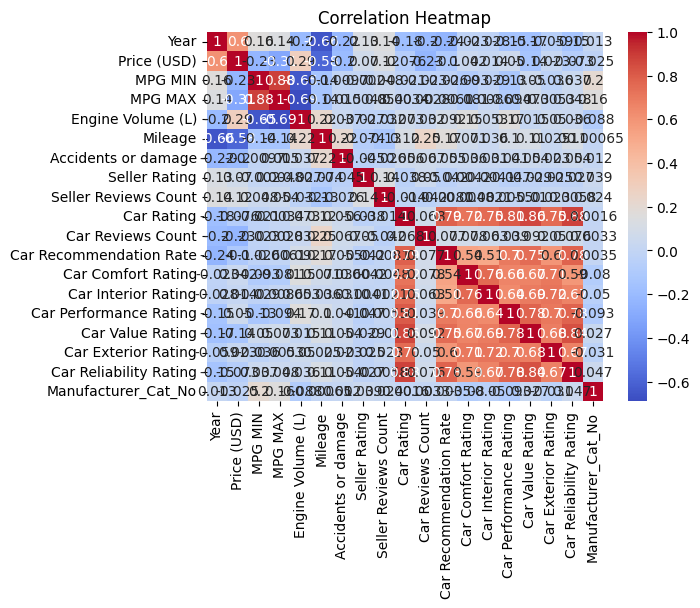

In [60]:
df_heat = df.drop('Manufacturer', axis=1).corr()
sns.heatmap(df_heat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

NameError: name 'model' is not defined

NameError: name 'LinearRegression' is not defined

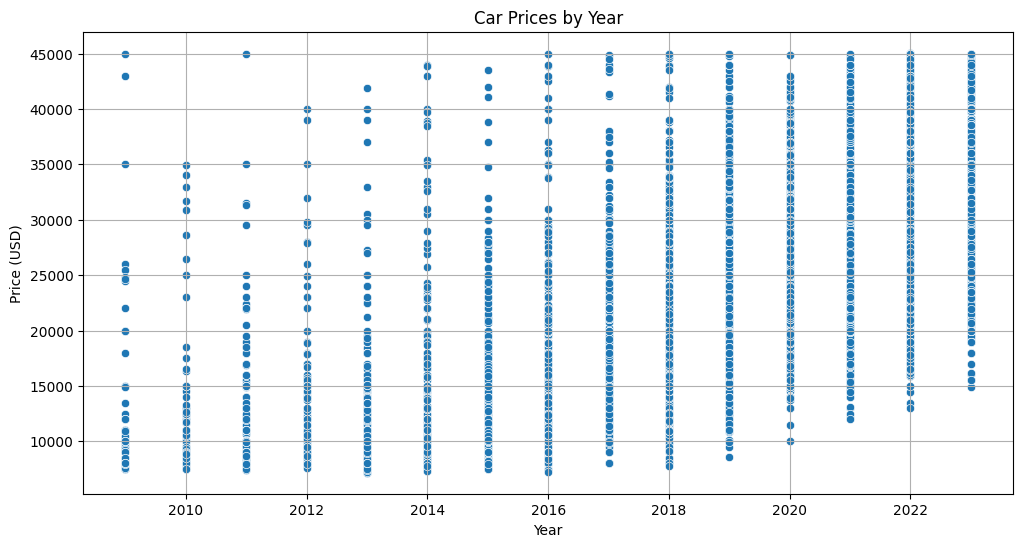

In [61]:
#scatter plot used cars Year(X) and Car Prices (USD) (Y)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Year', y='Price (USD)')
plt.title('Car Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

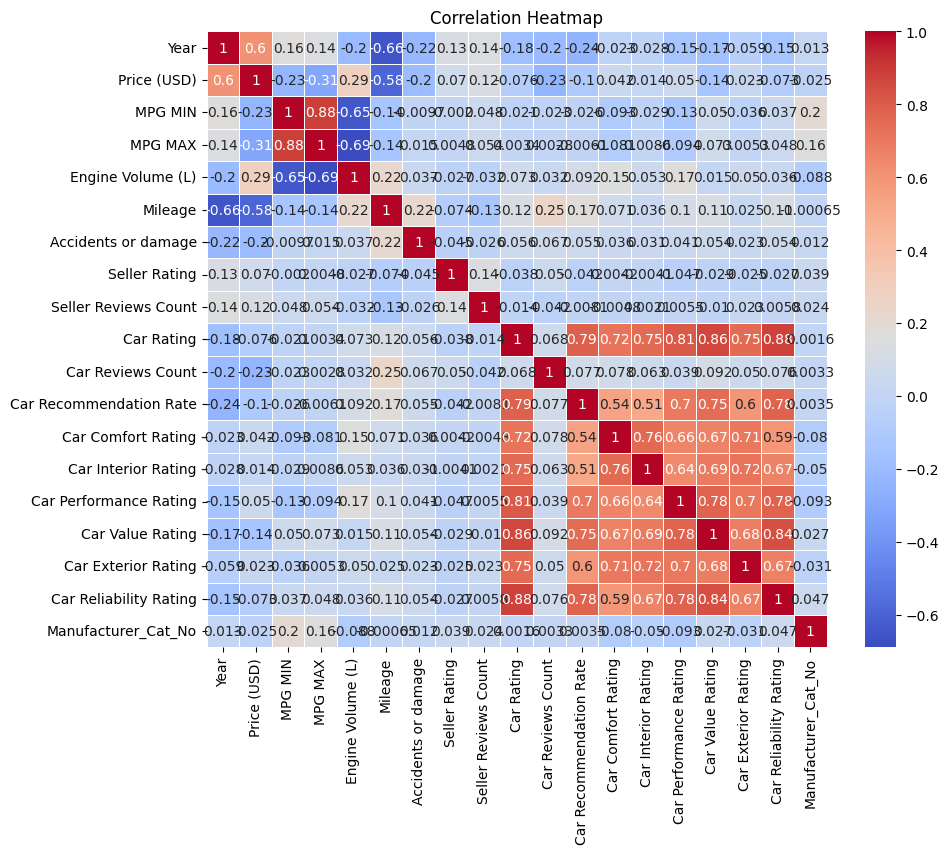

In [62]:
df_heat = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_heat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

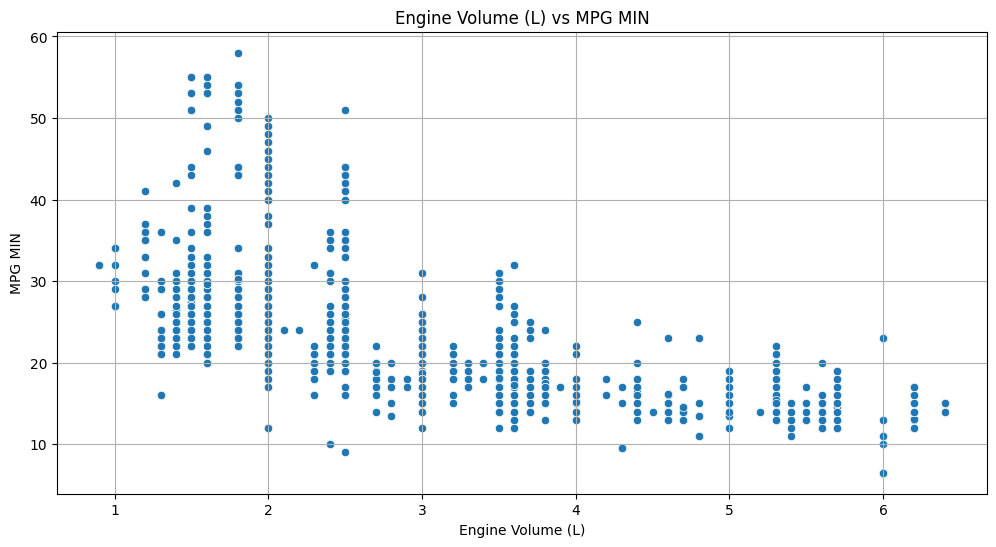

In [63]:
#scatter plot used cars Year(X) and Car Prices (USD) (Y)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Engine Volume (L)', y='MPG MIN')
plt.title('Engine Volume (L) vs MPG MIN')
plt.xlabel('Engine Volume (L)')
plt.ylabel('MPG MIN')
plt.grid(True)
plt.show()

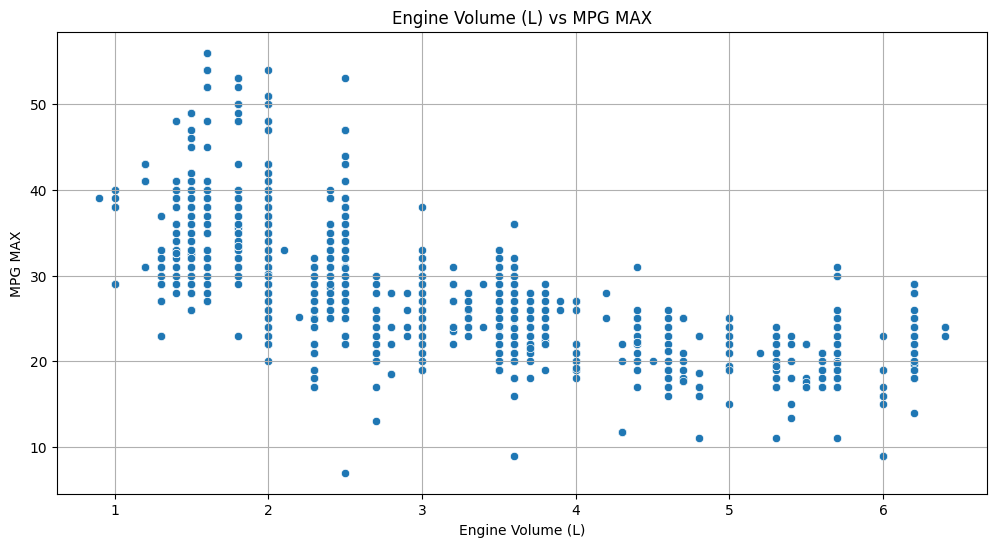

In [64]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Engine Volume (L)', y='MPG MAX')
plt.title('Engine Volume (L) vs MPG MAX')
plt.xlabel('Engine Volume (L)')
plt.ylabel('MPG MAX')
plt.grid(True)
plt.show()

In [56]:
df.to_excel('u_cars_prices_OutPut_Mickey_Midterm_updated.xlsx', index=False)
excel_file_path = 'u_cars_prices_OutPut_Mickey_Midterm_updated.xlsx'
files.download(excel_file_path)
#df.to_excel(excel_file_path, index=False)

#files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task
Investigate outliers in the car prices by year plot.

## Identify potential outliers

### Subtask:
Use a method like the Interquartile Range (IQR) or Z-score to identify data points that are significantly different from the rest of the data in terms of price for each year.


**Reasoning**:
Calculate the IQR and identify outliers for each year in the dataframe.



In [ ]:
#  Interquartile Range (IQR) or Z-score to identify data points that are significantly different from the rest of the data in terms of price for each year.

df['Year'] = df['Year'].dropna().astype(int)
q1 = df.groupby('Year')['Price (USD)'].transform(lambda x: x.quantile(0.25))
q3 = df.groupby('Year')['Price (USD)'].transform(lambda x: x.quantile(0.75))
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_df = df[(df['Price (USD)'] < lower_bound) | (df['Price (USD)'] > upper_bound)]
display(outliers_df.head())

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
33,Nissan,2017,35995.0,18.0,26.0,3.7,20152.0,1.0,4.0,209.0,4.8,19.0,100.0,4.2,4.5,4.9,4.6,5.0,5.0,39
78,Land,2016,39997.0,15.0,19.0,3.0,34455.0,0.0,4.9,273.0,4.3,22.0,77.0,4.6,4.4,4.4,4.0,4.7,4.0,29
92,Chevrolet,2010,28588.0,16.0,24.0,6.2,13462.0,0.0,4.4,18.0,4.6,214.0,93.0,4.4,4.3,4.8,4.5,4.8,4.6,10
108,Mercedes-Benz,2018,43953.0,17.0,22.0,4.0,27025.0,0.0,3.4,299.0,4.8,4.0,100.0,4.5,4.8,4.8,4.5,5.0,4.3,34
124,BMW,2017,37956.0,18.0,26.0,3.0,36309.0,1.0,4.6,194.0,5.0,19.0,100.0,4.6,4.7,5.0,5.0,4.9,5.0,7


## Examine outlier characteristics

### Subtask:
Once potential outliers are identified, display their corresponding rows in the DataFrame to see details like Manufacturer, Model, Mileage, and any other relevant features that might explain their unusual price.


**Reasoning**:
Display the first few rows of the `outliers_df` DataFrame to examine the identified outliers and their characteristics.



In [ ]:
display(outliers_df.head())

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Manufacturer_Cat_No
33,Nissan,2017,35995.0,18.0,26.0,3.7,20152.0,1.0,4.0,209.0,4.8,19.0,100.0,4.2,4.5,4.9,4.6,5.0,5.0,39
78,Land,2016,39997.0,15.0,19.0,3.0,34455.0,0.0,4.9,273.0,4.3,22.0,77.0,4.6,4.4,4.4,4.0,4.7,4.0,29
92,Chevrolet,2010,28588.0,16.0,24.0,6.2,13462.0,0.0,4.4,18.0,4.6,214.0,93.0,4.4,4.3,4.8,4.5,4.8,4.6,10
108,Mercedes-Benz,2018,43953.0,17.0,22.0,4.0,27025.0,0.0,3.4,299.0,4.8,4.0,100.0,4.5,4.8,4.8,4.5,5.0,4.3,34
124,BMW,2017,37956.0,18.0,26.0,3.0,36309.0,1.0,4.6,194.0,5.0,19.0,100.0,4.6,4.7,5.0,5.0,4.9,5.0,7


**Reasoning**:
Display all rows of the `outliers_df` DataFrame to examine all identified outliers and their characteristics in detail.



In [ ]:
display(outliers_df)

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating
78,Land,2016,39997.0,15.0,19.0,3.0,34455.0,0.0,4.9,273.0,4.3,22.0,77.0,4.6,4.4,4.4,4.0,4.7,4.0
79,Mercury,2003,42999.0,17.0,21.0,4.6,35650.0,0.0,5.0,5.0,4.8,23.0,95.0,4.8,4.6,4.9,4.6,4.6,4.8
92,Chevrolet,2010,28588.0,16.0,24.0,6.2,13462.0,0.0,4.4,18.0,4.6,214.0,93.0,4.4,4.3,4.8,4.5,4.8,4.6
101,Porsche,2005,26980.0,17.0,25.0,3.2,31950.0,0.0,4.4,22.0,4.8,36.0,88.0,4.4,4.7,4.9,4.7,5.0,4.5
108,Mercedes-Benz,2018,43953.0,17.0,22.0,4.0,27025.0,0.0,3.4,299.0,4.8,4.0,100.0,4.5,4.8,4.8,4.5,5.0,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,Lexus,2017,44499.0,16.0,25.0,5.0,53356.0,0.0,4.6,602.0,5.0,4.0,100.0,5.0,5.0,5.0,5.0,5.0,5.0
7823,Porsche,2007,44950.0,20.0,26.0,3.4,9877.0,0.0,4.7,174.0,4.9,43.0,100.0,4.4,4.6,4.8,4.7,5.0,4.8
7848,Chevrolet,2014,34984.0,16.0,28.0,6.2,57651.0,1.0,4.6,642.0,4.8,135.0,97.0,4.6,4.7,4.9,4.7,4.9,4.6
7867,Chevrolet,2014,43900.0,17.0,17.0,5.3,36797.0,0.0,4.4,30.0,4.4,5.0,80.0,4.0,3.8,4.2,4.4,4.4,4.8


## Visualize outliers

### Subtask:
Optionally, visualize the identified outliers on the scatter plot to see their position relative to the main cluster of data points.


## Show correlations between 'Price (USD)' and other numerical columns

### Subtask:
Calculate and display the correlation matrix or specific correlations related to 'Price (USD)'.

**Reasoning**:
Calculate the correlation matrix for the DataFrame and display the correlations of 'Price (USD)' with other numerical columns.

In [65]:
# Calculate the correlation matrix for only numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display the correlations with 'Price (USD)'
display(correlation_matrix['Price (USD)'].sort_values(ascending=False))

,Price (USD)
Price (USD),1.000000
Year,0.604026
Engine Volume (L),0.288169
Seller Reviews Count,0.124083
Seller Rating,0.070060
Car Performance Rating,0.050011
Car Comfort Rating,0.042050
Car Exterior Rating,0.022563
Car Interior Rating,0.013635
Manufacturer_Cat_No,-0.024970


**Reasoning**:
Create a scatter plot of 'Year' vs 'Price (USD)' for the original DataFrame and overlay the outliers from the `outliers_df` DataFrame with a different color to visualize their position.



## Summary:

### Data Analysis Key Findings

*   Using the Interquartile Range (IQR) method, outliers in car prices were identified for each year. These outliers were defined as data points falling outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR for their respective year.
*   The details of the identified outliers, including Manufacturer, Year, Price, Mileage, and other ratings, were displayed in a dedicated DataFrame called `outliers_df`.
*   The identified outliers were visually represented on a scatter plot of 'Year' versus 'Price (USD)', highlighted in red to distinguish them from the rest of the data points.

### Insights or Next Steps

*   Further investigation is needed to understand the specific characteristics of the identified outliers (e.g., luxury models, low mileage for older cars, unique features) that might explain their significantly higher or lower prices compared to other cars from the same year.
*   Depending on the goal of the analysis, a decision needs to be made on how to handle these outliers; options include removing them, transforming the data, or keeping them and using robust statistical methods.


# Task
Investigate outliers in the car prices plot.

## Load and preprocess data

### Subtask:
Load the data and preprocess it to handle missing values and replace 'Engine Volume (L)' values.


**Reasoning**:
The subtask is to load and preprocess the data. The previous code block failed because it tried to read the file from a URL. I will use `files.upload()` to upload the file and then read it using `pd.read_excel`. I will also fill missing values and replace engine volume values as instructed. I will also convert the 'Engine Volume (L)' column to numeric and save the processed dataframe.



**Reasoning**:
The previous code block failed due to a SyntaxError. I will fix the syntax error by correcting the missing closing bracket in the `df['Engine Volume (L)']` column name when calling the `.replace()` method.



## Identify potential outliers

### Subtask:
Use a method like the Interquartile Range (IQR) or Z-score to identify data points that are significantly different from the rest of the data in terms of price for each year.


**Reasoning**:
Calculate the IQR and identify outliers for each year in the dataframe.



,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,Seller Rating,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating
78,Land,2016,39997.0,15.0,19.0,3.0,34455.0,0.0,4.9,273.0,4.3,22.0,77.0,4.6,4.4,4.4,4.0,4.7,4.0
79,Mercury,2003,42999.0,17.0,21.0,4.6,35650.0,0.0,5.0,5.0,4.8,23.0,95.0,4.8,4.6,4.9,4.6,4.6,4.8
92,Chevrolet,2010,28588.0,16.0,24.0,6.2,13462.0,0.0,4.4,18.0,4.6,214.0,93.0,4.4,4.3,4.8,4.5,4.8,4.6
101,Porsche,2005,26980.0,17.0,25.0,3.2,31950.0,0.0,4.4,22.0,4.8,36.0,88.0,4.4,4.7,4.9,4.7,5.0,4.5
108,Mercedes-Benz,2018,43953.0,17.0,22.0,4.0,27025.0,0.0,3.4,299.0,4.8,4.0,100.0,4.5,4.8,4.8,4.5,5.0,4.3


## Examine outlier characteristics

### Subtask:
Once potential outliers are identified, display their corresponding rows in the DataFrame to see details like Manufacturer, Model, Mileage, and any other relevant features that might explain their unusual price.


**Reasoning**:
Display all rows of the `outliers_df` DataFrame to examine all identified outliers and their characteristics in detail.



## Visualize outliers

### Subtask:
Optionally, visualize the identified outliers on the scatter plot to see their position relative to the main cluster of data points.


**Reasoning**:
Create a scatter plot of 'Year' vs 'Price (USD)' for the original DataFrame and overlay the outliers from the `outliers_df` DataFrame with a different color to visualize their position.



## Summarize findings

### Subtask:
Summarize the findings from the outlier analysis, including the method used for identification, key characteristics of the outliers, and potential next steps for handling them in further analysis.


## Summary:

### Data Analysis Key Findings

*   The Interquartile Range (IQR) method, applied year-by-year, was used to identify outliers in the car prices.
*   The visualization clearly shows the identified outliers (highlighted in red) positioned away from the main cluster of data points on the scatter plot of car prices by year.

### Insights or Next Steps

*   Further investigation into the characteristics of the identified outliers (e.g., specific models, high/low mileage, rare features) could help explain their unusual pricing.
*   Depending on the goal of the subsequent analysis, a decision needs to be made on how to handle the outliers, such as removal, transformation, or further investigation.
